In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
train=pd.read_csv('train(t).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test(t).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
PassengerId=test.PassengerId
len(PassengerId)

418

In [5]:
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
train.var()

Survived       0.236772
Pclass         0.699015
Age          211.019125
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

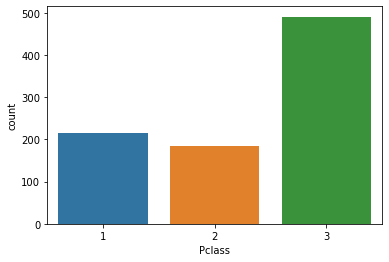

In [9]:
sns.countplot(train['Pclass'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

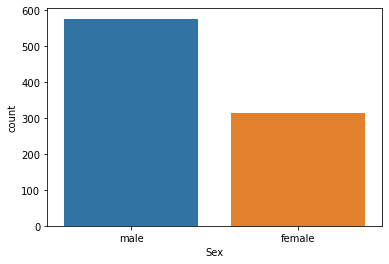

In [10]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

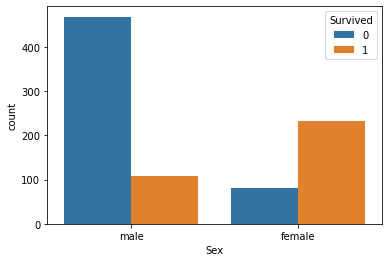

In [11]:
sns.countplot(x=train['Sex'],hue=train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

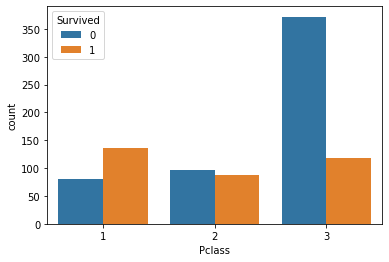

In [12]:
sns.countplot(x=train['Pclass'],hue=train['Survived'])

In [13]:
(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64

In [14]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [16]:
train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [17]:
def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [18]:
train['Age'] =train[['Age', 'Pclass']].apply(age_approx, axis=1)
test['Age'] =test[['Age', 'Pclass']].apply(age_approx, axis=1)

In [19]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [21]:
test['Fare']=test.fillna(test['Fare'].mean())


In [22]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [25]:
train['Fare']=train['Fare'].fillna(train['Fare'].mean())

In [26]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
combine=[train,test]

In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,2.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S


In [29]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,2.0,0,0,0,Q
1,3,female,2.0,1,0,0,S
2,2,male,3.0,0,0,0,Q
3,3,male,1.0,0,0,0,S
4,3,female,1.0,1,1,0,S


In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [33]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
FamilySize    0
IsAlone       0
dtype: int64

In [34]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
FamilySize    0
IsAlone       0
dtype: int64

In [35]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode())


In [36]:
train['Sex']=pd.get_dummies(train['Sex'])
train['Embarked']=pd.get_dummies(train['Embarked'])
test['Sex']=pd.get_dummies(test['Sex'])
test['Embarked']=pd.get_dummies(test['Embarked'])

In [37]:
for dataset in combine:
    dataset['sex*Embarked']=dataset.Sex * dataset.Embarked

In [38]:
for dataset in combine:
    dataset['sex*2']=dataset.Sex * dataset.Sex

In [39]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,sex*Embarked,sex*2
0,0,3,0,1.0,1,0,0,0,2,0,0,0
1,1,1,1,2.0,1,0,3,1,2,0,1,1
2,1,3,1,1.0,0,0,1,0,1,1,0,1
3,1,1,1,2.0,1,0,3,0,2,0,0,1
4,0,3,0,2.0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1,0,1,1,0,0
887,1,1,1,1.0,0,0,2,0,1,1,0,1
888,0,3,1,1.0,1,2,2,0,4,0,0,1
889,1,1,0,1.0,0,0,2,1,1,1,0,0


<AxesSubplot:>

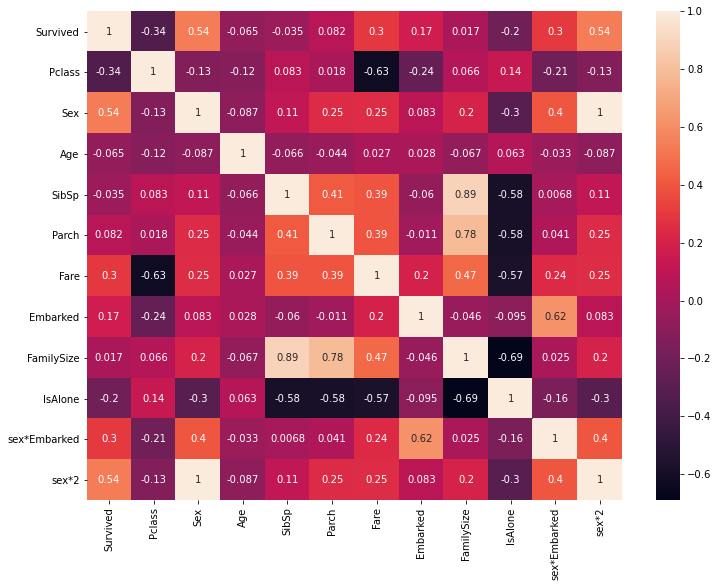

In [40]:
plt.figure(figsize=(12,9))
sns.heatmap(data=train.corr(),annot=True)

In [41]:
used_features =[
    "Embarked",
    "Age","FamilySize",'sex*2',
    "Fare","Sex",'sex*Embarked',]

x = train[used_features]
y = train['Survived']

In [42]:
train=train[[ "Pclass","Embarked",'Age','FamilySize',"Fare","Sex",'sex*2','sex*Embarked','Survived']]

In [43]:
x

,Embarked,Age,FamilySize,sex*2,Fare,Sex,sex*Embarked
0,0,1.0,2,0,0,0,0
1,1,2.0,2,1,3,1,1
2,0,1.0,1,1,1,1,0
3,0,2.0,2,1,3,1,0
4,0,2.0,1,0,1,0,0
...,...,...,...,...,...,...,...
886,0,1.0,1,0,1,0,0
887,0,1.0,1,1,2,1,0
888,0,1.0,4,1,2,1,0
889,1,1.0,1,0,2,0,0


In [44]:
test=test[used_features]
test

,Embarked,Age,FamilySize,sex*2,Fare,Sex,sex*Embarked
0,0,2.0,1,0,0,0,0
1,0,2.0,2,1,0,1,0
2,0,3.0,1,0,0,0,0
3,0,1.0,1,0,0,0,0
4,0,1.0,3,1,0,1,0
...,...,...,...,...,...,...,...
413,0,1.0,1,0,0,0,0
414,1,2.0,1,1,0,1,1
415,0,2.0,1,0,0,0,0
416,0,1.0,1,0,0,0,0


In [45]:
trainx,testx,trainy,testy=train_test_split(x,y,random_state=42,test_size=0.2)

In [46]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)

In [47]:
sm_trainx,sm_trainy=sm.fit_resample(trainx,trainy)

<AxesSubplot:>

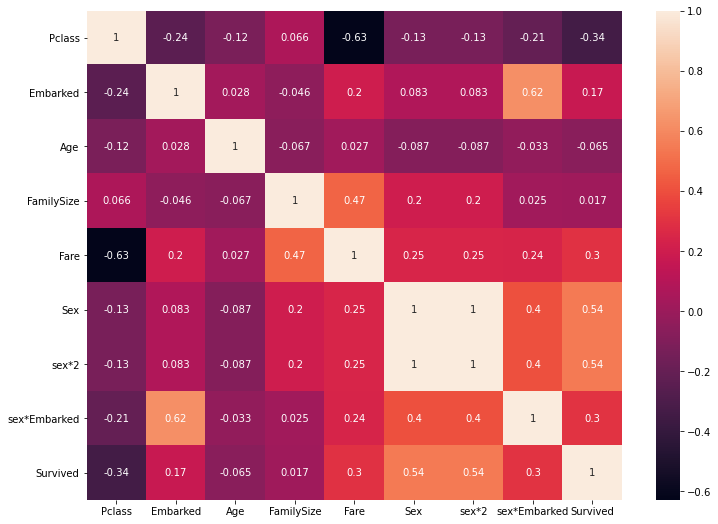

In [48]:
plt.figure(figsize=(12,9))
sns.heatmap(data=train.corr(),annot=True)

In [49]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=42)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
et_cv=ExtraTreesClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest',6:'ExtraTrees'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv,et_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, sm_trainx,sm_trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.762385086823289
Decision Tree Test Accuracy: 0.8007660878447396
KNN Test Accuracy: 0.7996169560776303
SVC Test Accuracy: 0.7725740551583249
Naive Bayes Test Accuracy: 0.7838227783452502
Random Forest Test Accuracy: 0.7951225740551583
ExtraTrees Test Accuracy: 0.8030260469867212


In [50]:
logreg=LogisticRegression()

In [51]:
logreg.fit(sm_trainx,sm_trainy)

LogisticRegression()

In [52]:
pred=logreg.predict(testx)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [53]:
accuracy_score(testy,pred)

0.770949720670391

## RandomForestClassifier

In [54]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=400,max_depth=7,min_samples_split=4,min_samples_leaf=6,random_state=33)

In [55]:
rf.fit(sm_trainx,sm_trainy)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       min_samples_split=4, n_estimators=400, random_state=33)

In [56]:
rf_pred=rf.predict(testx)
rf_pred1=rf.predict(trainx)

In [57]:
accuracy_score(testy,rf_pred)

0.7988826815642458

In [58]:
accuracy_score(trainy,rf_pred1)

0.8286516853932584

## GridSearchCV

In [59]:
rfc=RandomForestClassifier(random_state=123)

In [60]:
param_grid={'n_estimators':[100,400,300],'criterion':['gini','entropy'],'max_depth':[2,4,3],
    'min_samples_split':[5,3,4],'min_samples_leaf':[1,2,3,4]}

In [61]:
grid=GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [62]:
grid.fit(sm_trainx,sm_trainy)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 3, 4],
                         'n_estimators': [100, 400, 300]},
             scoring='accuracy', verbose=1)

In [63]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [64]:
grid_rf=RandomForestClassifier(criterion='entropy', min_samples_leaf=1,max_depth=4, min_samples_split=5,n_estimators=400,random_state=42)

In [65]:
grid_rf.fit(sm_trainx,sm_trainy)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [66]:
grid_pred_rf=grid_rf.predict(testx)
grid_pred_rf1=grid_rf.predict(trainx)

In [67]:
accuracy_score(testy,grid_pred_rf)

0.7932960893854749

In [68]:
accuracy_score(trainy,grid_pred_rf1)

0.8258426966292135

In [69]:
print(cross_val_score(grid_rf, sm_trainx, sm_trainy, cv=3))

[0.7972973  0.78378378 0.84121622]


In [70]:
grid_rf.score(sm_trainx, sm_trainy)

0.8186936936936937

## Decision tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dc=DecisionTreeClassifier(random_state=50)

In [73]:
dc.fit(sm_trainx,sm_trainy)

DecisionTreeClassifier(random_state=50)

In [74]:
dc_pred=dc.predict(testx)
dc_pred1=dc.predict(trainx)

In [75]:
accuracy_score(testy,dc_pred)

0.776536312849162

In [76]:
accuracy_score(trainy,dc_pred1)

0.8567415730337079

In [77]:
0.7374301675977654,0.702247191011236

(0.7374301675977654, 0.702247191011236)

In [78]:
param_grid1={
    'criterion':['gini','entropy'],'max_depth':[1,2,3],
    'max_features':[1,2,3],
    'max_leaf_nodes':[1,2],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3]}

In [79]:
grid1=GridSearchCV(estimator=dc, param_grid=param_grid1, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [80]:
grid1.fit(sm_trainx,sm_trainy)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits


D:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.59684685 0.59684685 0.59684685
 0.59684685 0.59684685 0.59684685 0.59684685 0.59684685 0.59684685
 0.59684685 0.59684685 0.59684685 0.59684685 0.59684685 0.59684685
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.77252252 0.77252252 0.77252252
 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252
 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.77252252 0.77252252 0.772522

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_features': [1, 2, 3],
                         'max_leaf_nodes': [1, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [81]:
grid1.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [82]:
grid_dc=DecisionTreeClassifier(criterion='gini',max_depth=1,max_features=1
                               ,max_leaf_nodes=2,min_samples_leaf=1, min_samples_split=2,random_state=18)

In [83]:
grid_dc.fit(sm_trainx,sm_trainy)

DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2,
                       random_state=18)

In [84]:
grid_dc_pred=grid_dc.predict(testx)
grid_dc_pred1=grid_dc.predict(trainx)

In [85]:
accuracy_score(testy,grid_dc_pred)

0.6703910614525139

In [86]:
accuracy_score(trainy,grid_dc_pred1)

0.6797752808988764

## SVC

In [87]:
svc=SVC(C=3.0, degree=3, gamma= 'auto', kernel= 'rbf')

In [88]:
svc.fit(sm_trainx,sm_trainy)

SVC(C=3.0, gamma='auto')

In [89]:
svc_pred=svc.predict(testx)
svc_pred1=svc.predict(trainx)

In [90]:
accuracy_score(testy,svc_pred)

0.7932960893854749

In [91]:
accuracy_score(trainy,svc_pred1)

0.827247191011236

In [92]:
param_grid2={'C':[3.0,4.0,5.0,6.0,7.0],
    'kernel':['rbf','linear', 'sigmoid',],
    'degree':[3,4,5,2],
    'gamma':['scale','auto']}

In [93]:
grid2=GridSearchCV(estimator=svc, param_grid=param_grid2, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [94]:
grid2.fit(sm_trainx,sm_trainy)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=SVC(C=3.0, gamma='auto'), n_jobs=-1,
             param_grid={'C': [3.0, 4.0, 5.0, 6.0, 7.0], 'degree': [3, 4, 5, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [95]:
grid2.best_params_

{'C': 5.0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

## GradientBoostingClassifier

In [96]:
gbm=GradientBoostingClassifier()

In [97]:
gbm.fit(sm_trainx,sm_trainy)

GradientBoostingClassifier()

In [98]:
gbm_pred=gbm.predict(testx)
gbm_pred1=gbm.predict(trainx)

In [99]:
print(accuracy_score(testy,gbm_pred))
print(accuracy_score(trainy,gbm_pred1))

0.8044692737430168
0.8356741573033708


## XGBClassifier

In [100]:
from xgboost import XGBClassifier

In [101]:
xgb = XGBClassifier()

In [102]:
xgb.fit(sm_trainx,sm_trainy)
preds = xgb.predict(testx)
preds1 = xgb.predict(trainx)

[11:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [103]:
accuracy_score(testy,preds)

0.8044692737430168

In [104]:
accuracy_score(trainy,preds1)

0.8441011235955056

## ExtraTreesClassifier

In [105]:
ExtC = ExtraTreesClassifier()
ex_param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300,400],
              "criterion": ["gini","entropy"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=4, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(sm_trainx,sm_trainy)


Fitting 4 folds for each of 162 candidates, totalling 648 fits


D:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80067568 0.79954955 0.80067568 0.8018018  0.79954955 0.80067568
 0.80518018 0.80518018 0.80292793 0.80630631 0.80968468 0.80630631
 0.80743243 0.80855856 0.80855856 0.80855856 0.80743243 0.80968468
 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252 0.77252252
 0.77252252 0.77252252 0.77252252 0.79842342 0.79842342 0.79842342
 0.79842342 0.8018018  0.79842342 0.80518018 0.80292793 0.80292793
 0.80855856 0.81081081 0.81306306 0.81193694 0.80968468 0.80743243
 0.80743243 0.80855856 0.80630631 0.77252252 0.77252252 0.77252252
 0.7713964  0.77252252 0.77252252 0.7713964  0.77252252 0.77252252
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        n

GridSearchCV(cv=4, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300, 400]},
             scoring='accuracy', verbose=1)

In [106]:
gsExtC.best_params_

{'criterion': 'entropy',
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 400}

In [107]:
gsExtC = ExtraTreesClassifier(random_state=116,criterion='entropy',max_features=4, min_samples_leaf=2, min_samples_split=3,n_estimators=400)

In [108]:
gsExtC.fit(sm_trainx,sm_trainy)

ExtraTreesClassifier(criterion='entropy', max_features=4, min_samples_leaf=2,
                     min_samples_split=3, n_estimators=400, random_state=116)

In [109]:
pred_exc=gsExtC.predict(testx)
pred_exc1=gsExtC.predict(trainx)

In [110]:
accuracy_score(testy,pred_exc)

0.8100558659217877

In [111]:
accuracy_score(trainy,pred_exc1)

0.8441011235955056

In [112]:
test.isna().sum()

Embarked        0
Age             0
FamilySize      0
sex*2           0
Fare            0
Sex             0
sex*Embarked    0
dtype: int64

In [113]:
rf_pred_test=gsExtC.predict(test)
rf_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [114]:
df=pd.DataFrame({'Survived':rf_pred_test},index=PassengerId)
df

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [115]:
file_name='ex_titanic.csv'
df.to_csv(file_name)